<a href="https://colab.research.google.com/github/magrihalah/TP4_RNN/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Travail pratique 4 : Segmentation d'images 2D


### Monter le réperdoire de google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!cp -r drive/MyDrive/IFT780/TP4/* .

Mounted at /content/drive


### Aller dans le bon répertoire et exécuter le code.



In [2]:
ls

drive/  requirements.txt  sample_data/  src/


In [3]:
cd src/

/content/src


In [4]:
ls

fig1.png  manage/  models/  train.ipynb  train.py  utils/


In [ ]:
!python train.py --help

usage: 
 python3 train.py [model] [dataset] [hyper_parameters]
 python3 train.py --model UNet [hyper_parameters]
 python3 train.py --model UNet --predict

This program allows to train different models of classification on different datasets. Be aware
that when using UNet model there is no need to provide a dataset since UNet model only train on
acdc dataset.

options:
  -h, --help            show this help message and exit
  --model {CnnVanilla,VggNet,AlexNet,ResNet,yourUNet,yourSegNet,UNet}
  --dataset {cifar10,svhn}
  --loss LOSS
  --batch_size BATCH_SIZE
                        The size of the training batch
  --optimizer {Adam,SGD}
                        The optimizer to use for training the model
  --num-epochs NUM_EPOCHS
                        The number of epochs
  --validation VALIDATION
                        Percentage of training data to use for validation
  --lr LR               Learning rate
  --data_aug            Data augmentation
  --predict PREDICT     Name of the f

### Entraînement d'un UNet

In [7]:
!python train.py --model=UNet --loss=dice --num-epochs=5 --batch_size=8 --lr=0.01  # par defaut sauvegarde les parametres

Data augmentation NOT activated!
100% 170M/170M [00:12<00:00, 13.1MB/s]
Traceback (most recent call last):
  File "/content/src/train.py", line 143, in <module>
    train_set = HDF5Dataset('train', acdc_hdf5_file, transform=acdc_base_transform)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/src/manage/HDF5Dataset.py", line 33, in __init__
    self.data = self._load_data()
                ^^^^^^^^^^^^^^^^^
  File "/content/src/manage/HDF5Dataset.py", line 60, in _load_data
    with h5py.File(self.file_path, 'r') as f:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/h5py/_hl/files.py", line 564, in __init__
    fid = make_fid(name, mode, userblock_size, fapl, fcpl, swmr=swmr)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/h5py/_hl/files.py", line 238, in make_fid
    fid = h5f.open(name, flags, fapl=fapl)
          ^^^^^^^^^^

In [ ]:
!python train.py --model=UNet --num-epochs=2 --batch_size=32 --lr=0.01

Data augmentation NOT activated!
100% 170M/170M [00:12<00:00, 13.6MB/s]
Training UNet on acdc for 2 epochs
Epoch: 1 of 2
100% 40/40 [01:09<00:00,  1.73s/it, Train loss=1.11, train_acc=0.0249]
Validation loss 5.110
Validation accuracy 0.027
Epoch: 2 of 2
100% 40/40 [01:09<00:00,  1.74s/it, Train loss=0.673, train_acc=0.0386]
Validation loss 0.547
Validation accuracy 0.046
Finished training.
Accuracy of the network on the test set: 5.084 %
Figure(1000x1000)
Figure(1000x1000)
Figure(1000x1000)
Figure(1000x500)


In [ ]:
ls

fig1.png  fig3.png  fig4.png  fig5.png  manage/  models/  train.ipynb  train.py  UNet.pt  utils/


In [ ]:
# Le fichier UNet_acc_valid_79.pt contient les poids d'un UNet ayant une justesse de 79%.
!python train.py --model UNet --predict ./UNet_acc_valid_79.pt

Data augmentation NOT activated!
Traceback (most recent call last):
  File "/content/src/train.py", line 147, in <module>
    model.load_weights(args.predict)
  File "/content/src/models/CNNBaseModel.py", line 72, in load_weights
    self.load_state_dict(torch.load(file_path, map_location=device))
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/serialization.py", line 1425, in load
    with _open_file_like(f, "rb") as opened_file:
         ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/serialization.py", line 751, in _open_file_like
    return _open_file(name_or_buffer, mode)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/serialization.py", line 732, in __init__
    super().__init__(open(name, mode))
                     ^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: './UNet_acc_valid_79.pt'


### Pour une raison quelconque, matplotlib ne fonctionne pas bien dans google Colab. Par consquent, une autre façon de visualiser les résultats est de sauvegarder les figures et de les afficher par la suite (voir cellule suivante)

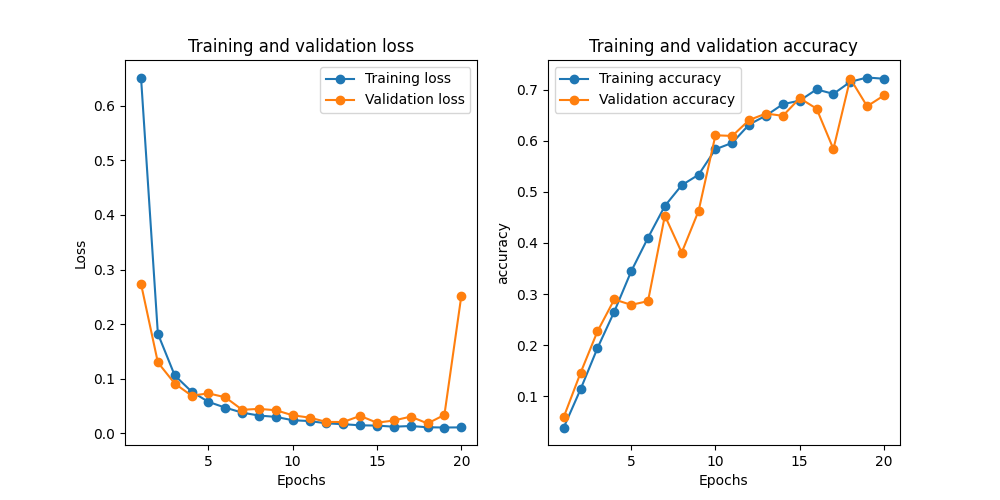

FileNotFoundError: [Errno 2] No such file or directory: 'fig2.png'

In [ ]:
from IPython.display import Image, display

listOfImageNames = ['fig1.png', 'fig2.png', 'fig3.png', 'fig4.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))